# Lab 2 - Seven-Segment Digits Recognition & MLP Decision Region Visualisation

In this lab, there are two exercises focused on:

*  [Exercise 1:](#Ex1) How to recognise seven-segment digits by using a Single-Layer Perceptron (SLP) through [scikit-learn](https://scikit-learn.org/stable/index.html).

*  [Exercise 2:](#Ex2) How to plot a decision region by using a Multi-Layer Perceptron (MLP) through [NumPy](https://numpy.org/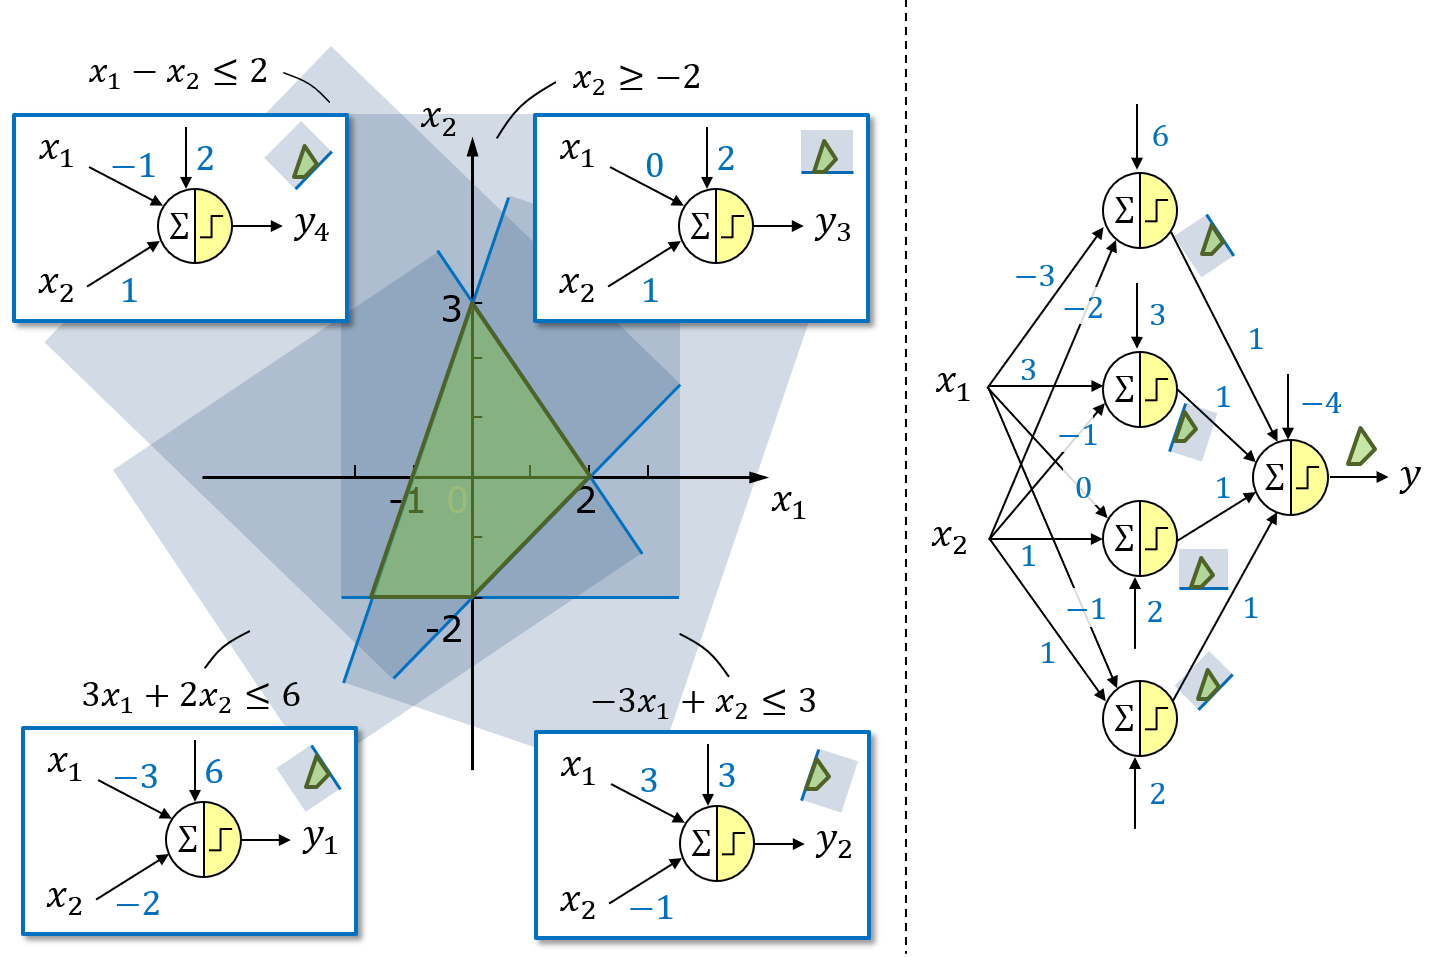).



# <a name="Ex1">Exercise 1.</a> Recognising Seven-Segment Digits

Seven-segment displays are widely used in digital clocks and basic calculators. The most common patterns used for numerical digits `0` to `9` are as follows:

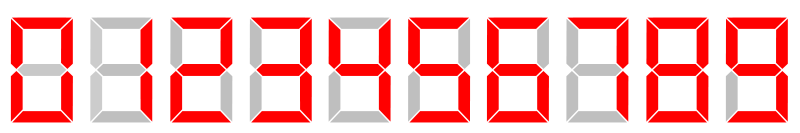

In this exercise, you will learn how to recognise seven-segment digits by using a perceptron in scikit-learn.

First, let's import the `NumPy` library and the `Perceptron` class from scikit-learn's `linear_model` module.

In [ ]:
# Import NumPy library with the alias np
import numpy as np

# Import the Perceptron class from scikit-learn's linear_model module
from sklearn.linear_model import Perceptron

*  [Scikit-learn](https://scikit-learn.org/) is an open-source machine learning library for Python that provides simple and efficient tools for data analysis and modeling.
*  [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) is a module that focuses on linear models for various tasks, such as classification and regression.

By the end of this exercise, you will practice using `Scikit-learn` to create and train the Perceptron model, retrieve model parameters (weights and bias), make predictions, and evaluate the accuracy of the model. In particular, this exercise will familiarise you with the following functions in `sklearn.linear_model`:

| Models & Functions        | Description                                 |
|---------------------------|---------------------------------------------|
| perceptron = [Perceptron()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron) | Create a Perceptron model                   |
| perceptron.[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron.fit)          | Train the Perceptron model                  |
| perceptron.coef_          | Retrieve the learned weights (coefficients) |
| perceptron.intercept_     | Retrieve the bias (intercept)               |
| perceptron.[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron.predict)      | Make predictions                            |
| [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)          | Evaluate the accuracy of the model          |

## 1.1 Define Input Features (`X`) - Patterns for Digits `0` to `9`

First, we define the patterns for the numerical digits `0` to `9` by using a 2-D array according to the segment indices of a seven-segment display in Figure 1:

<figure>
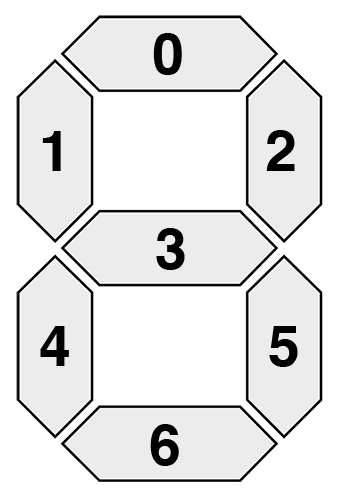
<figcaption>Figure 1 - Seven-Segment Display</figcaption>
</figure>

Below, in the 2-D array (`X`), each row is a binary vector representing a digit. For instance, the first row is `[0, 0, 1, 0, 0, 1, 0]`, where two `1` elements at index positions 2 and 5 indicate that turning on the segments `2` and `5` in Figure 1 would display the digit `1`.

In [4]:
# Define patterns for digits '0' to '9' as input features (X)
X = np.array([
      #     segment index
      #  0  1  2  3  4  5  6
        [0, 0, 1, 0, 0, 1, 0],  # '1'
        [1, 0, 1, 1, 1, 0, 1],  # '2'
        # ... ...
        # TODO: Complete the remaining patterns for the numerical digits '3' to '9' and '0',
        # according to the segment indices of a seven-segment display in Figure 1.
        # Each row represents a digit.
        # ... ...
        [1, 0, 1, 1, 0, 1, 1], # '3'
        [0,1,1,1,0,1,0], # '4'
        [1,1,0,1,0,1,1], # 5
        [1,1,0,1,1,1,1], # 6
        [1,0,1,0,0,1,0], # 7
        [1,1,1,1,1,1,1], # 8
        [1,1,1,1,0,1,0], # 9
        [0,0,0,0,0,0,0], # 0
    ])

## 1.2 Define Target Labels (`y`) - Recognised Digits

We define target labels (`y`). `y` is a vector of length 10, representing the 10 recognised numerical digits associated with the input patterns `X`.

Note that the Perceptron in scikit-learn can handle non-binary target values, but it is important to note that the underlying algorithm is still a binary classifier. When the Perceptron is used for a multi-class classification problem with non-binary target values, scikit-learn automatically employs the "one-vs-rest" strategy to extend the binary classification to multiple classes.

In [5]:
# TODO: Add a line of code to define the corresponding labels (y) for recognised digits
y = np.array([1,2,3,4,5,6,7,8,9,0])

## 1.3 Plot Seven-Segment Display

We next create a `plot_seven_segment` function that takes a list of `digits` as input and plots the corresponding seven-segment displays in a sequence.

In [6]:
# Make sure to have Matplotlib installed
!pip install matplotlib

# Import the Matplotlib library with the alias plt for creating plots and visualizations
import matplotlib.pyplot as plt

def plot_seven_segment(digits):
    # Create a figure with an appropriate size for the number of digits
    plt.figure(figsize=(len(digits) * 0.8, 1.2))

    for i, digit in enumerate(digits):
        try:
            # Find the index of the current digit in the dataset
            index = np.where(y == digit)[0][0]
        except IndexError:
            # Raise an error if the digit is invalid
            raise ValueError(f"Invalid digit at index {i}. Please provide a digit between 0 and 9.")

        # Create a subplot for each digit
        plt.subplot(1, len(digits), i + 1)

        # Plot the activated segments based on the dataset
        for j, activated in enumerate(X[index]):
            if activated:
                if j == 0:
                    plt.plot((0, 1), (1.5, 1.5), c='r', linewidth=4)
                elif j == 1:
                    plt.plot((0, 0), (0.75, 1.5), c='r', linewidth=4)
                elif j == 2:
                    plt.plot((1, 1), (0.75, 1.5), c='r', linewidth=4)
                elif j == 3:
                    plt.plot((0, 1), (0.75, 0.75), c='r', linewidth=4)
                elif j == 4:
                    plt.plot((0, 0), (0.75, 0), c='r', linewidth=4)
                elif j == 5:
                    plt.plot((1, 1), (0.75, 0), c='r', linewidth=4)
                elif j == 6:
                    plt.plot((0, 1), (0, 0), c='r', linewidth=4)

        # Set the title for each subplot
        plt.title(f'Digit {digit}')
        # Turn off axis ticks and labels
        plt.axis('off')

    # Display the figure with all subplots
    plt.show()

Below, using `plot_seven_segment` function, we plot a sequence of numerical digits from 0 to 9.

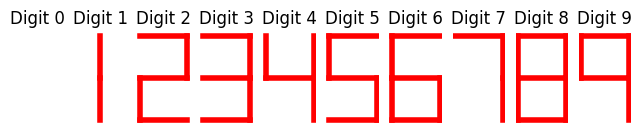

In [ ]:
plot_seven_segment(np.arange(0, 10))

## 1.4 Sampling

We now randomly select 100 samples from the input digtal patterns (`X`) and the corresponding labels (`y`). Using `np.random.choice`, we create an array of random indices named `random_indices`. The array consists of `100` integers randomly selected from the range `[0, len(X))`.


In [7]:
# TODO: Add a line of code to generate a random array named 'random_indices' using NumPy's random.choice function.
# The indices are selected from the range [0, len(X)).
# The size of the array is set to 100, specifying the number of samples to be randomly chosen.
import numpy as np
size = 1000
random_indices = np.random.choice(len(X),size)

X_dataset = X[random_indices]
y_dataset = y[random_indices]

 To plot the distribution of the generated indices, we now create a histogram of the `random_indices` array using `plt.hist` function.

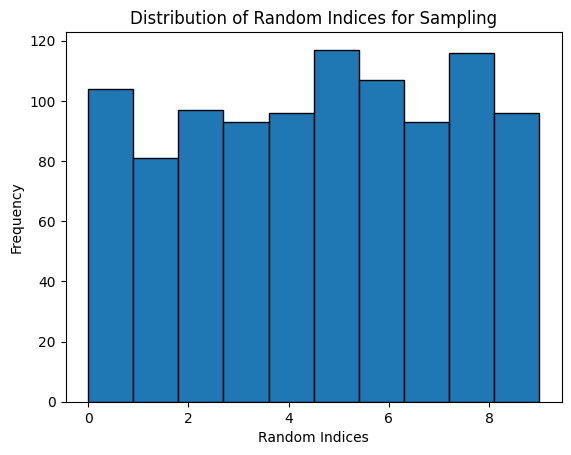

In [8]:
# Plot the distribution of indices using a histogram
plt.hist(random_indices, bins=len(X), edgecolor='black')
plt.title('Distribution of Random Indices for Sampling')
plt.xlabel('Random Indices')
plt.ylabel('Frequency')
plt.show()

Next, we split the datasets `X_dataset` and `y_dataset` into training and testing sets using `train_test_split` function. The training set consists of `X_train` features and `y_train` labels, while the testing set consists of `X_test` features and `y_test` labels. The test set size is set to `10%`.

In [12]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split


# TODO: Add a line of code to split the dataset into training and testing sets using train_test_split function:
# X_train and y_train are the training features and labels, respectively.
# X_test and y_test are the testing features and labels, respectively.
# The test set size is set to 10%.
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(X_train)
print(y_train)
print(y_train.shape)
print(X_train.shape)

[[1 0 1 1 1 0 1]
 [1 0 1 0 0 1 0]
 [0 1 1 1 0 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 0 1 0]
 [1 0 1 1 0 1 1]
 [0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0]
 [1 1 0 1 0 1 1]]
[2 7 4 8 9 3 1 0 5]
(9,)
(9, 7)


## 1.5 Training


Next, we create a Perceptron model and train the model using the `fit()` method with input features `X_train` and output labels `y_train`.

In [ ]:
# TODO: Add a line of code to create a Perceptron model with a maximum of 100 iterations
#
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter = 100)

# TODO: Add a line of code to train the Perceptron model using fit() method on the input features (X_train) and corresponding labels (y_train)
#
clf.fit(X_train, y_train)
#Perceptron()
clf.score(X, y)

0.8

Now, let's print the learned weights (coefficients) and bias (intercept) of the trained Perceptron model. The `coef_` attribute of the Perceptron model contains the coefficients assigned to the features, and `intercept_` represents the bias term.

In [ ]:
# TODO: Add a line of code to print the learned weights (coefficients) of the Perceptron model
print("Weights (coefficients):")
print(clf.coef_)

# TODO: Add a line of code to print the learned bias (intercept) of the Perceptron model
print("Bias (intercept):")
print(clf.intercept_)

Weights (coefficients):
[[ 0. -1. -1. -1.  0. -1.  0.]
 [-2. -1.  1. -1.  0.  1.  0.]
 [ 0. -2.  1.  1.  2. -3.  1.]
 [-3.  2.  0.  2. -1. -1. -1.]
 [ 1.  1. -4.  1. -6.  0.  2.]
 [-1.  0. -5. -1.  2.  0.  0.]
 [ 3. -3.  0. -3. -1.  0. -1.]
 [ 0.  2.  1. -1.  2.  0.  1.]
 [ 2.  2.  0.  1. -2. -1. -3.]]
Bias (intercept):
[ 1. -1. -1. -2. -1. -2. -2. -3. -3.]


## 1.6 Make Predictions

We now make predictions using the trained Perceptron model on the input features `X_test`. The `predict()` method is employed to obtain the model's predictions based on the learned weights and bias.

In [ ]:
# TODO: Add a line of code to make predictions on the input features (X), using the trained Perceptron model.
#
y_pred = clf.predict(X_test)

# Print the predictions and model parameters
print("Input Features:")
print(X_test)
print("\nTrue Labels:")
print(y_test)
print("\nPredictions:")
print(y_pred)

Input Features:
[[1 0 1 1 0 1 1]]

True Labels:
[3]

Predictions:
[2]


## 1.7 Evaluate Predictive Accuracy

Finally, we evaluate the accuracy of the model by comparing the true labels (`y_test`) with the predicted labels (`y_pred`) using the `accuracy_score` function. The resulting accuracy is then printed in percentage format.

In [ ]:
# Import the accuracy_score function from scikit-learn's metrics module
from sklearn.metrics import accuracy_score

# TODO: Add a line of code to evaluate the accuracy of the model using the accuracy_score function,
# by comparing the true labels (y_test) with the predicted labels (y_pred).
accuracy = ...

# Print the accuracy in percentage format
print(f"Predictive Accuracy: {accuracy * 100:.2f}%")

# TODO: Add a line of code to plot the seven-segment displays for y_pred, using 'plot_seven_segment' function


TypeError: unsupported operand type(s) for *: 'ellipsis' and 'int'

---

# <a name="Ex2">Exercise 2.</a>  Plotting a Given Decision Region using MLP

In this exercise, you will learn how to construct a Multi-Layer Perceptron (MLP) for plotting a given decision region.

Specifically, given the following green region, you will learn how to use NumPy to effectively visualise it by building a Multi-Layer Perceptron (MLP).

<figure>
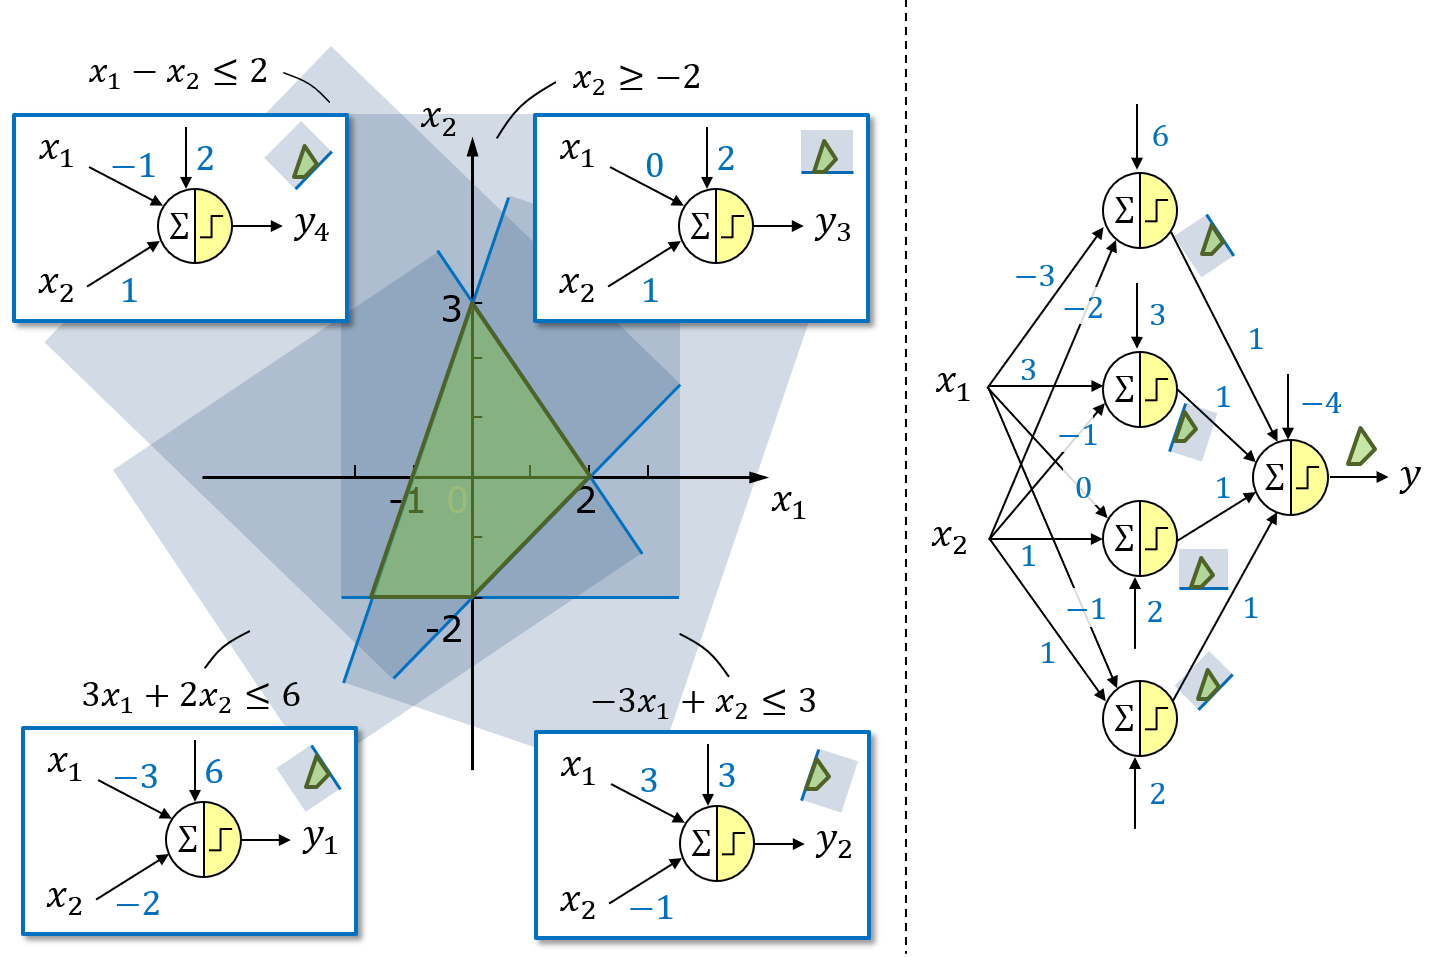
<figcaption>Figure 2 - A decision region (green) represented by an MLP, consisting of four perceptrons (denoting four half-planes) in the hidden layer and one AND perceptron (denoting their intersection) in the output layer.</figcaption>
</figure>


The green region can be expressed as the intersection of four blue half-planes, and each half-plane can be represented by a single-layer perceptron. Therefore, the architecture of the MLP is depicted in Figure 2 (right), with each layer outlined as follows:

*   Input layer: two variables, `x1` and `x2`, denoting the set of points in the 2-D plane.

*   Hidden layer: four perceptrons, each representing a half-plane.

*   Output layer: an `AND` perceptron, representing the intersection of the four half-planes, i.e. the green area in Figure 2 (left).


## 2.1 Import NumPy and Matplotlib

First, we import `NumPy` and `Matplotlib` libraries.

In [ ]:
# Import the NumPy library and alias it as 'np'
import numpy as np

# Import the Matplotlib library and alias it as 'plt'
import matplotlib.pyplot as plt

## 2.2 Define Weights and Biases

Next, we define `weights` for MLP, with two sets of weights: one (`w1`) for the hidden layer, and another (`w2`) for the output layer.

*   `w1` is a 2-D array with 2 rows and 4 columns. Each `i`-th column represents the weights of the `i`-th neuron in the hidden layer.

*   `w2` is a 2-D array with 4 rows and 1 column. The column  corresponds to the weights of the `AND` neuron in the output layer.



In [ ]:
# Define the weights of the MLP

# TODO: Add a 2-D array (w1) with 2 rows and 4 columns to represent weights for hidden layer
w1 = np.array(...)

# TODO: Add a 2-D array (w2) with 4 rows and 1 column to represent weights for output layer
w2 = np.array(...)

weights = [w1, w2]


Similarly, we define `biases` for MLP, with two sets of biases: one for the hidden layer (`b1`) and another for the output layer (`b2`).

*   `b1` is a 1-D array with 4 entries. Each `i`-th entry represents the bias of the `i`-th neuron in the hidden layer.

*   `b2` is a 1-D array with 1 entry, denoting the bias of the `AND` neuron in the output layer.

In [ ]:
# Define the biases for the MLP

# TODO: Add a 1-D array (b1) with 4 entries to represent biases for hidden layer
b1 = np.array(...)

# TODO: Add a 1-D array (b2) with 1 entry to represent bias for output layer
b2 = np.array(...)

biases = [b1, b2]


## 2.3 Define Heaviside Step Function

Next, we define a Heaviside step function `heaviside()`. It outputs 0 for any negative input and 1 for any non-negative input.

In [ ]:
# Define the Heaviside step function
def heaviside(x):
    # TODO: Add a line of code to implement Heaviside step function
    return ...

 We now define a function `mlp()` to implement forward propagation, and compute the output of the MLP. The Heaviside activation function is applied to both the hidden and output layers.

In [ ]:
# Define the MLP function
def mlp(x):  # x: Input features
    # TODO: Add a line of code to implement:
    # Forward pass 1: Compute the output of hidden layer (hidden_layer),
    #                 using x, weights[0], biases[0], and Heaviside function.
    hidden_layer = ...

    # TODO: Add a line of code to implement:
    # Forward pass 2: Compute the output of output layer (output_layer),
    #                 using hidden_layer, weights[1], biases[1], and Heaviside function.
    output_layer = ...

    # Output of the MLP after the forward pass
    return output_layer

## 2.4 Make Predictions

Next, we create a grid of points using `np.meshgrid`, flatten the grid points, pass them through the MLP using the `mlp` function, and reshape the predictions to match the shape of the original grid.

More specifically, using `np.meshgrid`, we now create a 2-D grid of points (`xx` and `yy`) by linearly spacing values within the specified ranges of `-4` to `4` for both `x` and `y` axes. The resulting grid consists of `500` points along each dimension. This grid will be used for visualising the decision boundaries in the MLP.

In [ ]:
# TODO: Add a line of code to generate a 2D grid of points (using np.meshgrid)
#       that spans the range [-4, 4] in both x and y directions.
#       The resulting xx and yy arrays are both of shape (500, 500),
#       representing the X and Y coordinates of each point in a 2-D grid.

xx, yy = ...

We now flatten the 2-D arrays `xx` and `yy` (representing X and Y coordinates) into 1-D arrays using the `np.ravel()` function. Then, we use the `np.c_[]` function to concatenate these flattened arrays along the second axis, creating a 2-D array (`grid_points`) where each row represents a point in the original 2-D grid.

In [ ]:
# Flatten and concatenate X and Y coordinates to create a 2D array of grid points
grid_points = np.c_[xx.ravel(), yy.ravel()]

Next, we pass `grid_points` through the `mlp()` function to make predictions for the `grid_points` using the MLP.

In [ ]:
# TODO: Add a line of code to pass the flattened grid points through the MLP model to get predictions.
#       The resulting array Z contains the model's predictions for each point in the 2D grid.
Z = ...

# Reshape the predictions to match the shape of the grid
Z = Z.reshape(xx.shape)

## 2.5 Plot Decision Region for MLP

Using `plt.contourf()` from `Matplotlib`, we next create a filled contour plot. The X and Y coordinates of the plot are determined by the 2-D arrays `xx` and `yy`, and the color fill is determined by the predictions `Z` obtained from the MLP model.

Finally, we plot the decision region for MLP. We customise the `Matplotlib` plot by setting labels for the x and y axes, add a title to the plot, and display dashed lines for both the x and y axes.

In [ ]:
# TODO: Add a line of code to create a filled contour plot,
#       using the predictions Z on the 2D grid defined by xx and yy.
#       `alpha=0.5` is set for the transparency of the filled contours.
#


# Set labels for the x and y axes
plt.xlabel('Feature 1 (X1)')
plt.ylabel('Feature 2 (X2)')

# Set the title of the plot
plt.title('MLP Decision Region')

# Display dashed lines for the x and y axes
plt.axhline(0, color='black', linestyle='dashed', linewidth=0.5)
plt.axvline(0, color='black', linestyle='dashed', linewidth=0.5)

# Show the plot
plt.show()

# Bonus Exercise

 Based on the code in Exercise 2, write a code snippet to build a MLP for plotting the following specified decision region.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Write a code snippet to build a MLP for plotting the following specified decision region (in yellow).


